# Read the data 

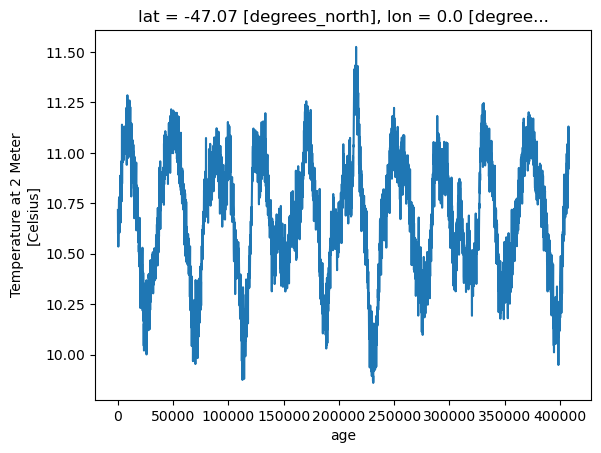

In [2]:
import xarray as xr

# import .nc data
ds = xr.open_dataset('D:/VScode/Last_deglaciation/loveclim_data/loveclim_se_orbital_only_atm.nc')

ds
# rename the TREFHT to sat
ds = ds.rename({'t2m': 'sat'})
# rename the time to age
ds = ds.rename({'mtime': 'age'})
# # multiply age by 1000
ds['age'] = ds['age'] * 1000

ds

# # # convert the sat to degrees C
# # ds['sat'] = ds['sat'] - 273.15

ds = ds[['sat']]
ds

# plot a record from the ds_sat at given lat and lon
ds['sat'].isel(lat=7, lon=0).plot()

ds_sat=ds



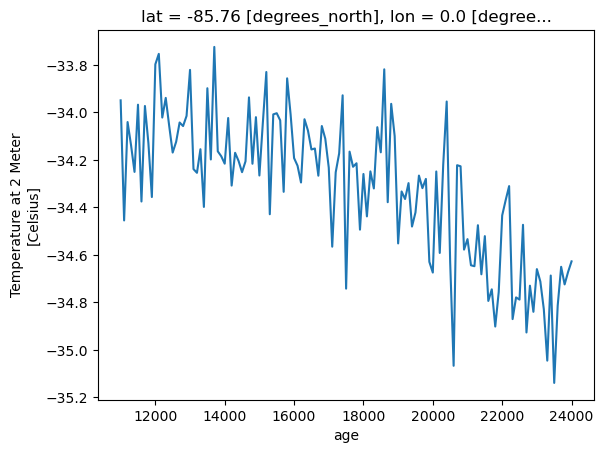

In [3]:
ds_sat = ds_sat.sel(age=slice(24000, 11000))
ds_sat['sat'].isel(lat=0, lon=0).plot()

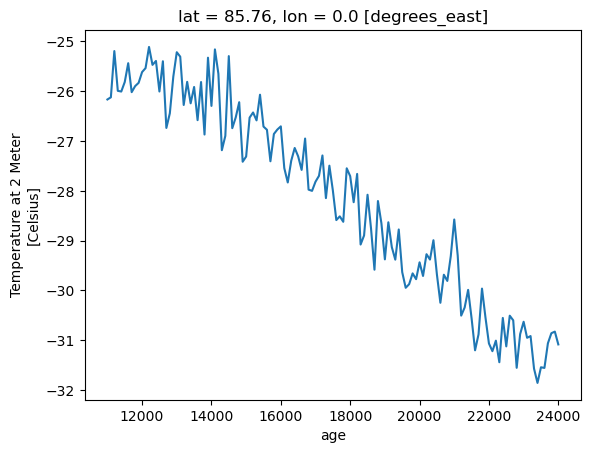

In [16]:
ds_sat = ds_sat.sel(age=slice(24000, 11000))
ds_sat['sat'].isel(lat=-1, lon=0).plot()

# PCA

shape of the weight: (32,)
shape of the reshaped sat_centered_weighted: (131, 2048)


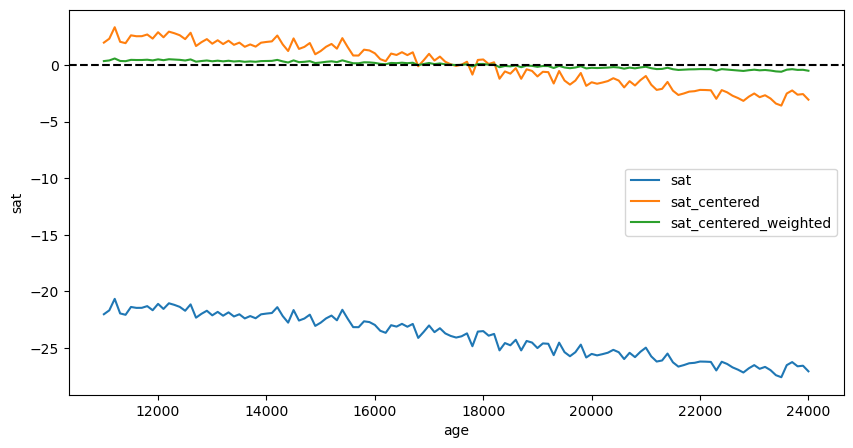

In [4]:
from toolbox import PCA_functions as pf
# 1. Center the Data
ds_sat = pf.center_data(ds_sat)

# 2. Weight the Data
ds_sat = pf.apply_weighting(ds_sat)

# 3. Plot the Centered and Weighted Data
# Assuming you want to plot data for lat=0 and lon=0
lat_index = 30
lon_index = 50
pf.plot_sat_variables(ds_sat, lat_index, lon_index)


In [5]:
from toolbox import PCA_functions as pf
# 4. Perform PCA
exp_variance, eofs, pcs = pf.sat_PCA(ds_sat)
print('Explained variance:', exp_variance)


shape of the reshaped sat_centered_weighted: (2048, 131)
shape of u, s, vh: (2048, 2048) (131,) (131, 131)
shape of EOFs: (2048, 2)
shape of PCs: (131, 2)
Explained variance: [8.38765383e-01 2.41754781e-02 1.99691039e-02 1.40231485e-02
 1.12995282e-02 7.27491826e-03 5.89338457e-03 4.57896711e-03
 4.50506574e-03 3.67327291e-03 3.50622018e-03 2.79086176e-03
 2.77132541e-03 2.65129353e-03 2.61813286e-03 2.42674560e-03
 2.28885026e-03 2.04341509e-03 1.96798216e-03 1.93316792e-03
 1.76377222e-03 1.60372932e-03 1.55204814e-03 1.41486421e-03
 1.37445540e-03 1.28507067e-03 1.27251050e-03 1.12031295e-03
 1.09171867e-03 1.07629434e-03 1.03553082e-03 9.43269697e-04
 9.14089265e-04 8.52737925e-04 8.29322147e-04 7.95775675e-04
 7.70721061e-04 7.62123964e-04 6.97000127e-04 6.79014716e-04
 6.58233883e-04 6.49921014e-04 6.10775081e-04 5.90126903e-04
 5.62840141e-04 5.39291126e-04 5.35155239e-04 5.20918460e-04
 5.11674618e-04 4.94344044e-04 4.54437279e-04 4.51016444e-04
 4.17091447e-04 4.11780435e-04 4

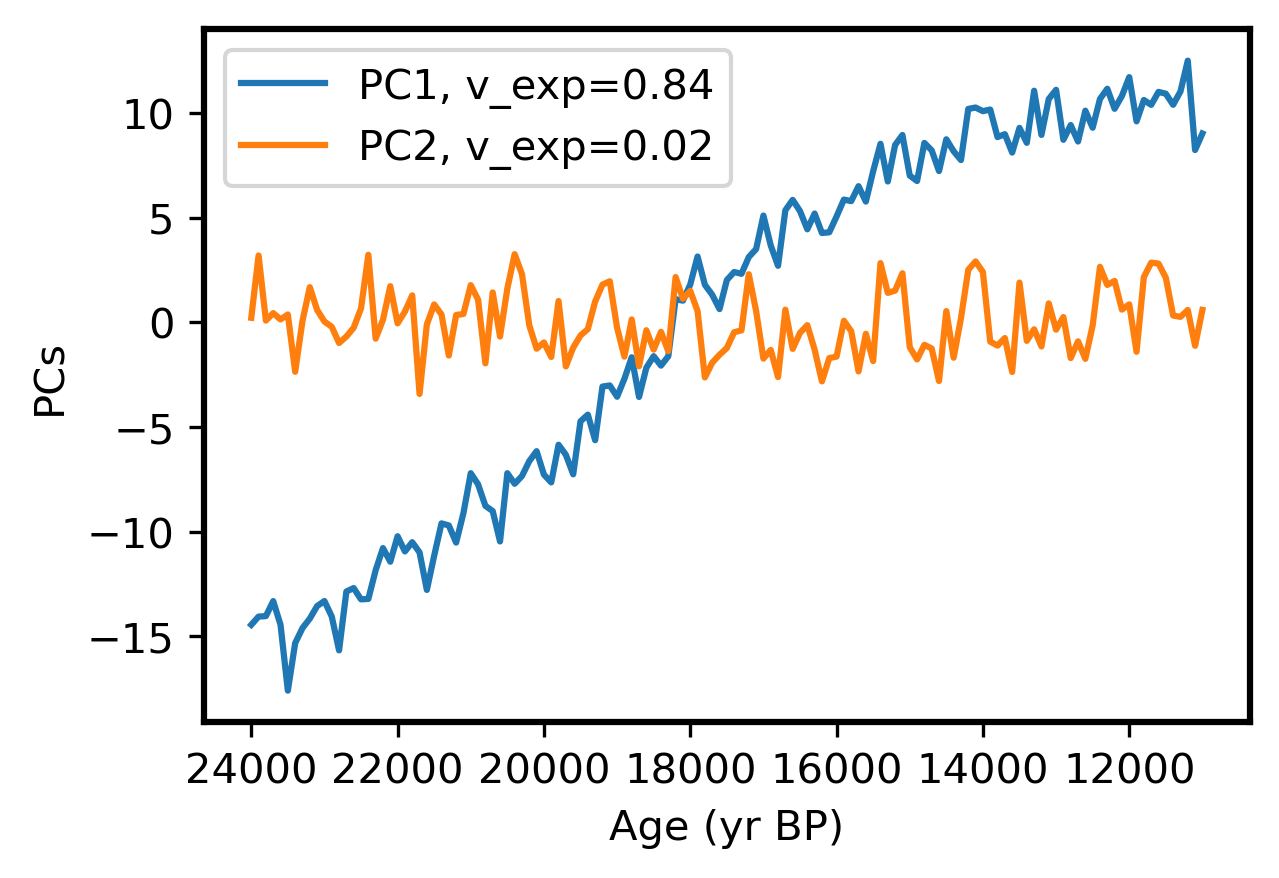

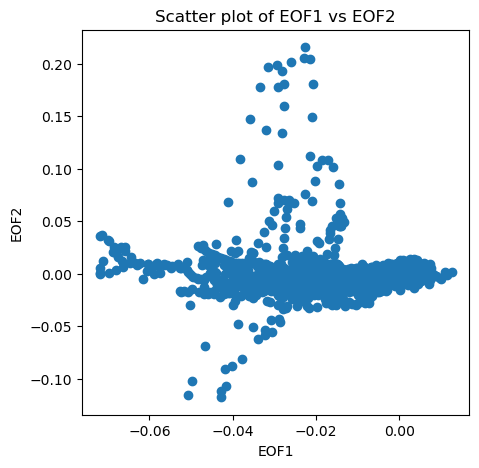

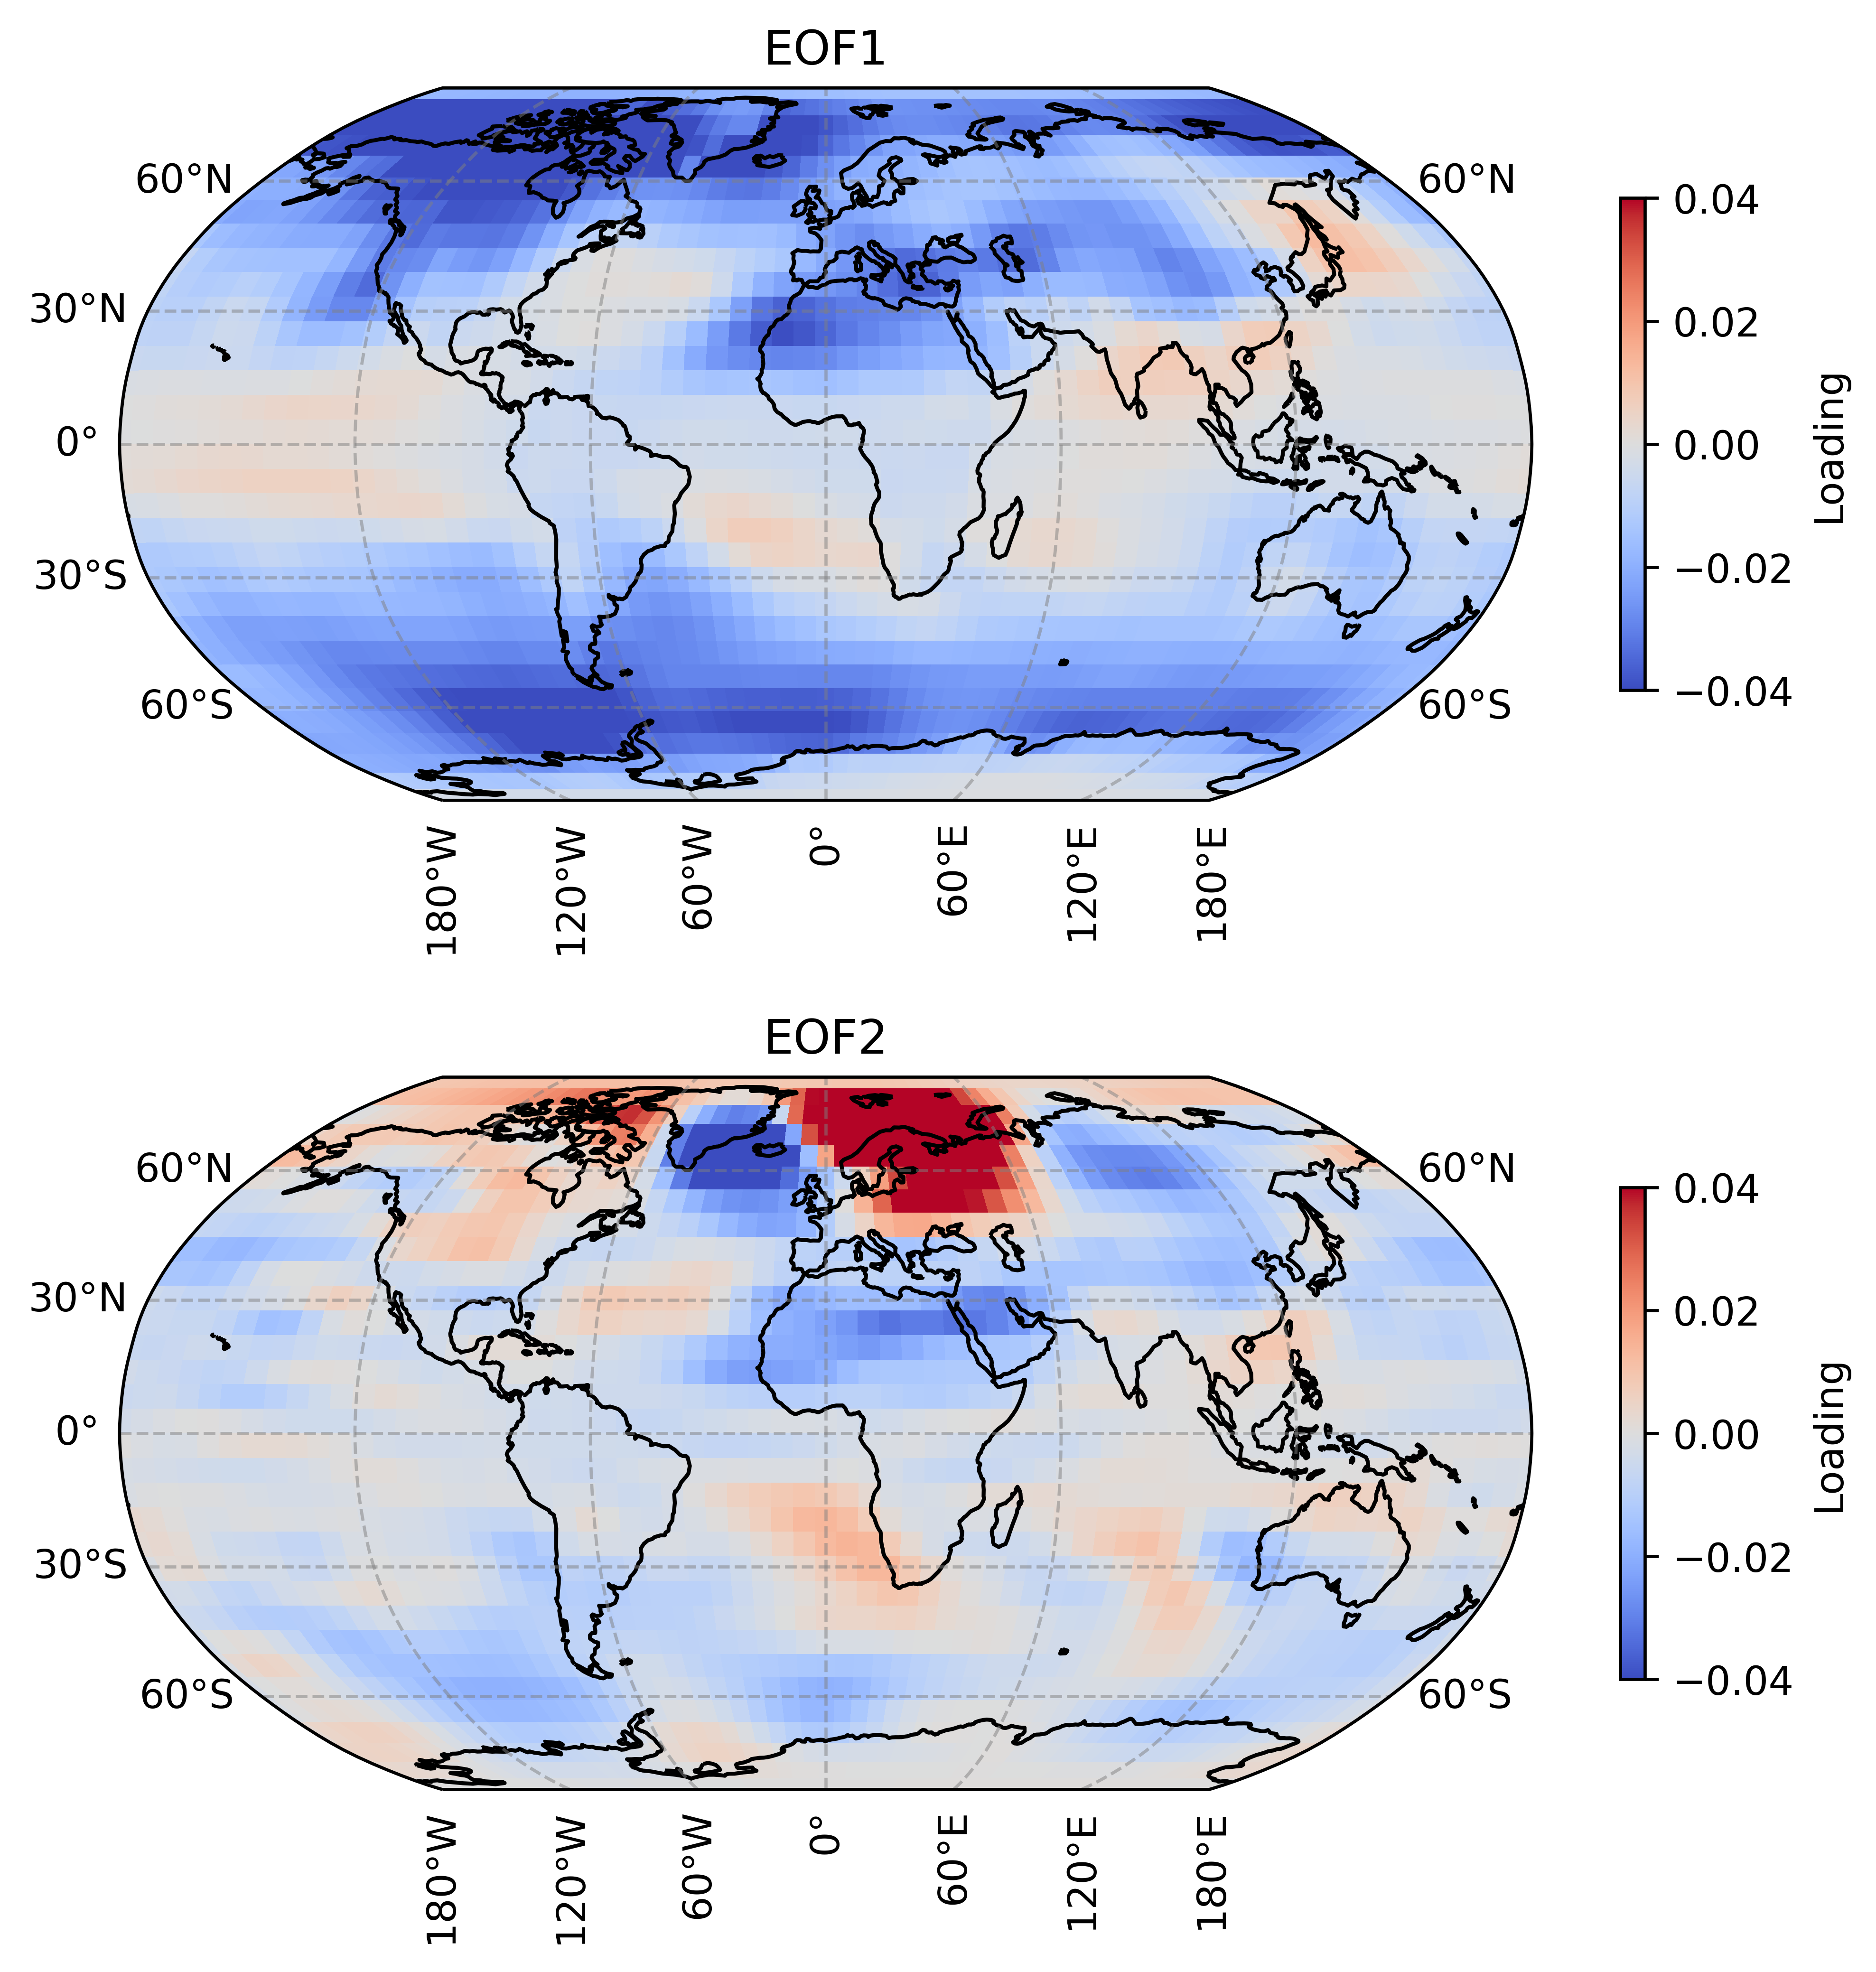

(<Figure size 4800x5400 with 4 Axes>,
 array([<GeoAxes: title={'center': 'EOF1'}>,
        <GeoAxes: title={'center': 'EOF2'}>], dtype=object))

In [6]:
# 5. Plot PCs
pf.plot_pcs(ds_sat['age'].values, pcs, exp_variance)

# 6. Plot EOF Scatter
pf.plot_eof_scatter(eofs)

# 7. Plot the EOF Map
pf.plot_eof_map(eofs, ds_sat['lat'].values, ds_sat['lon'].values)

# GMM

d:\Users\User\anaconda3\envs\pz_venv_causal\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=8.
  warnings.warn(


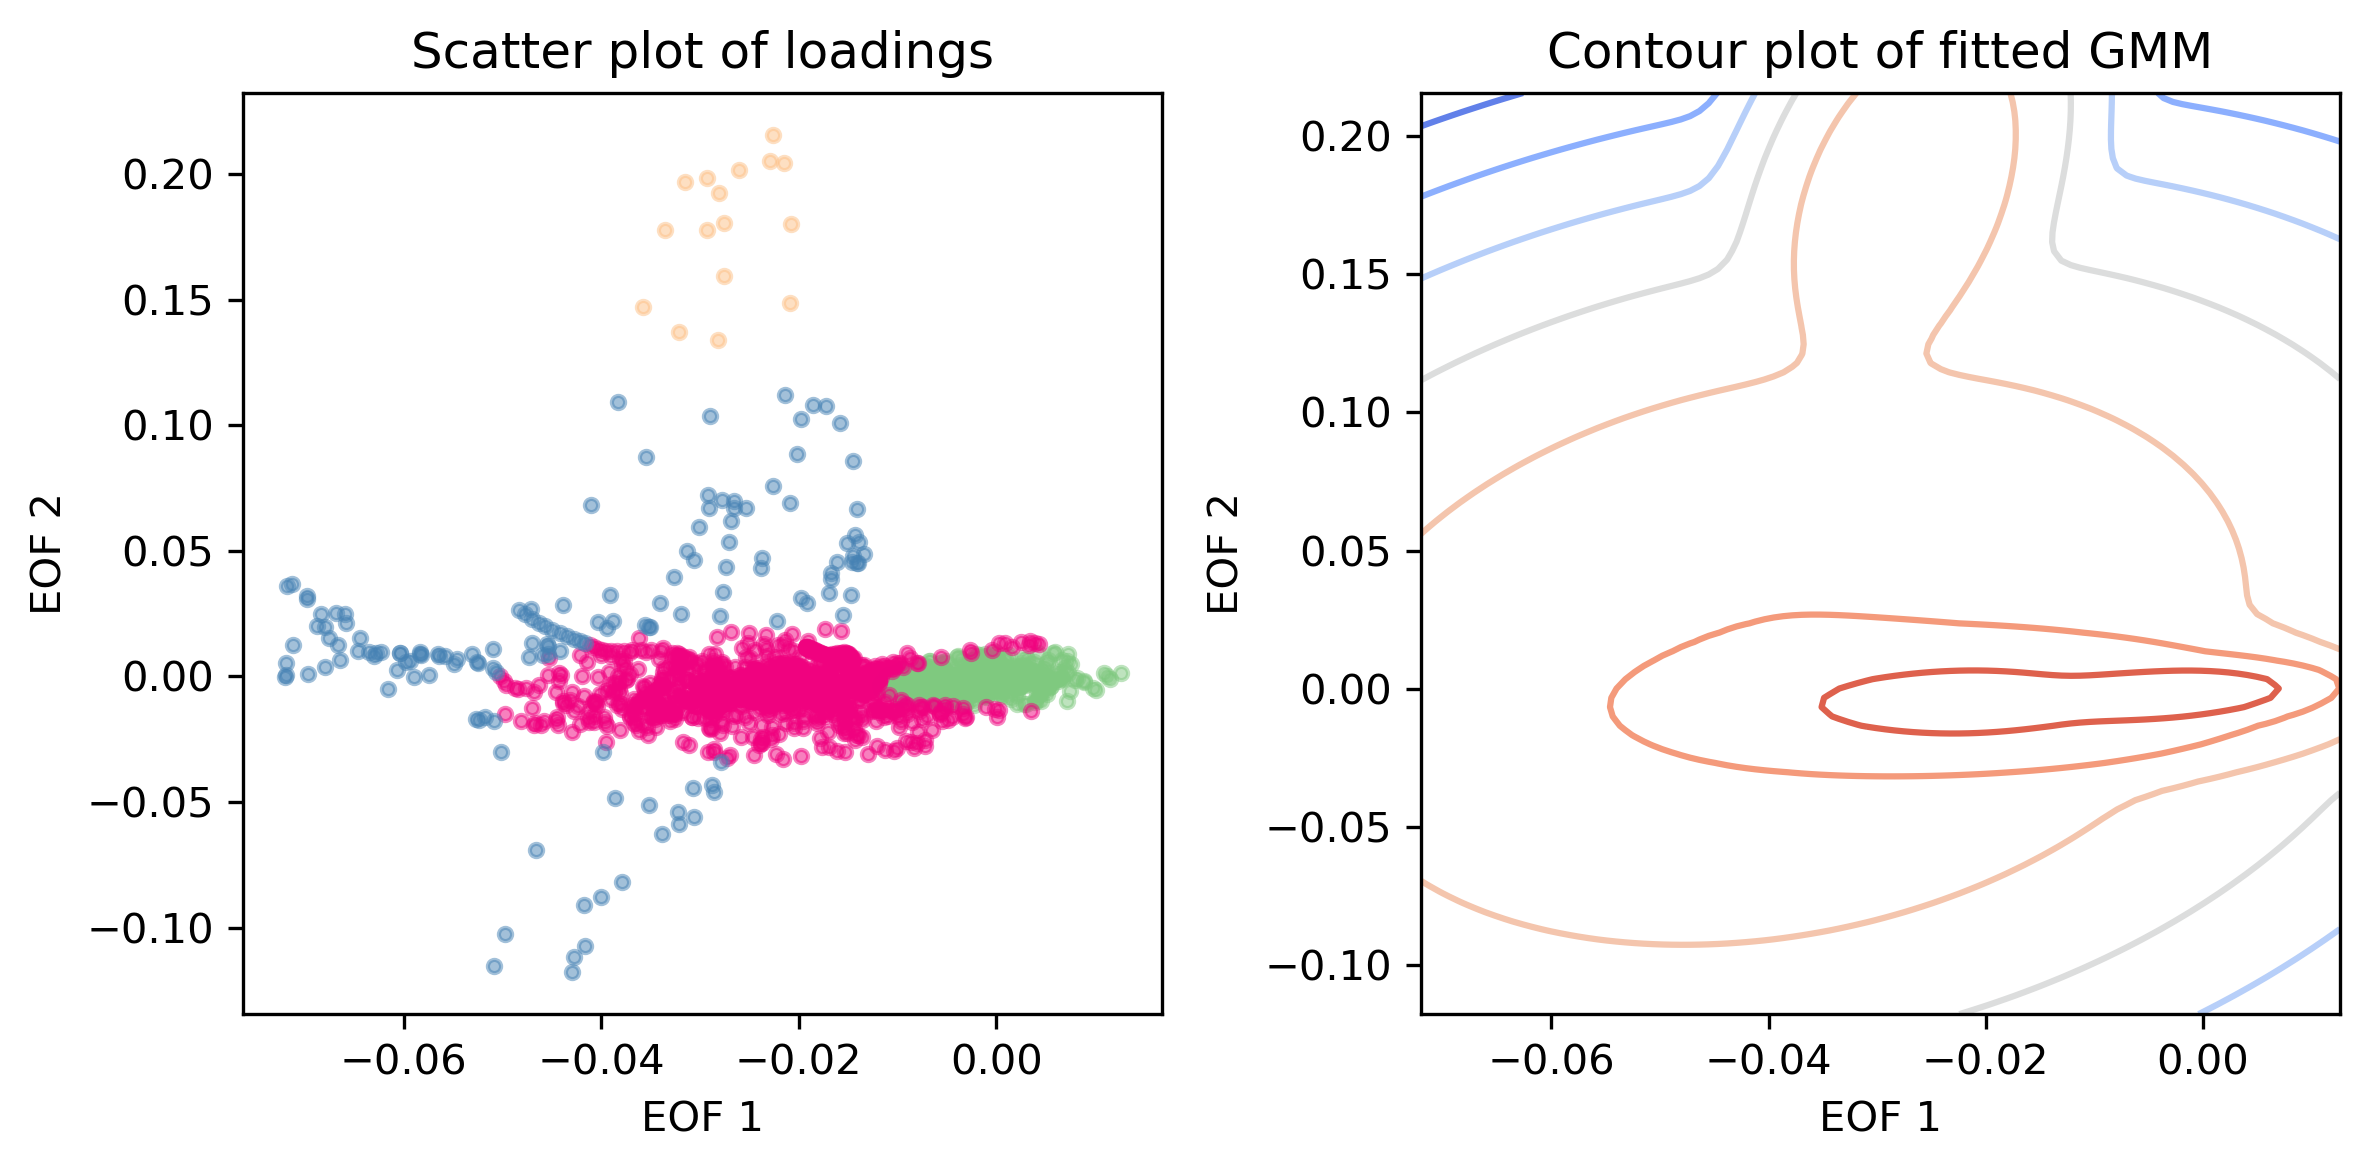

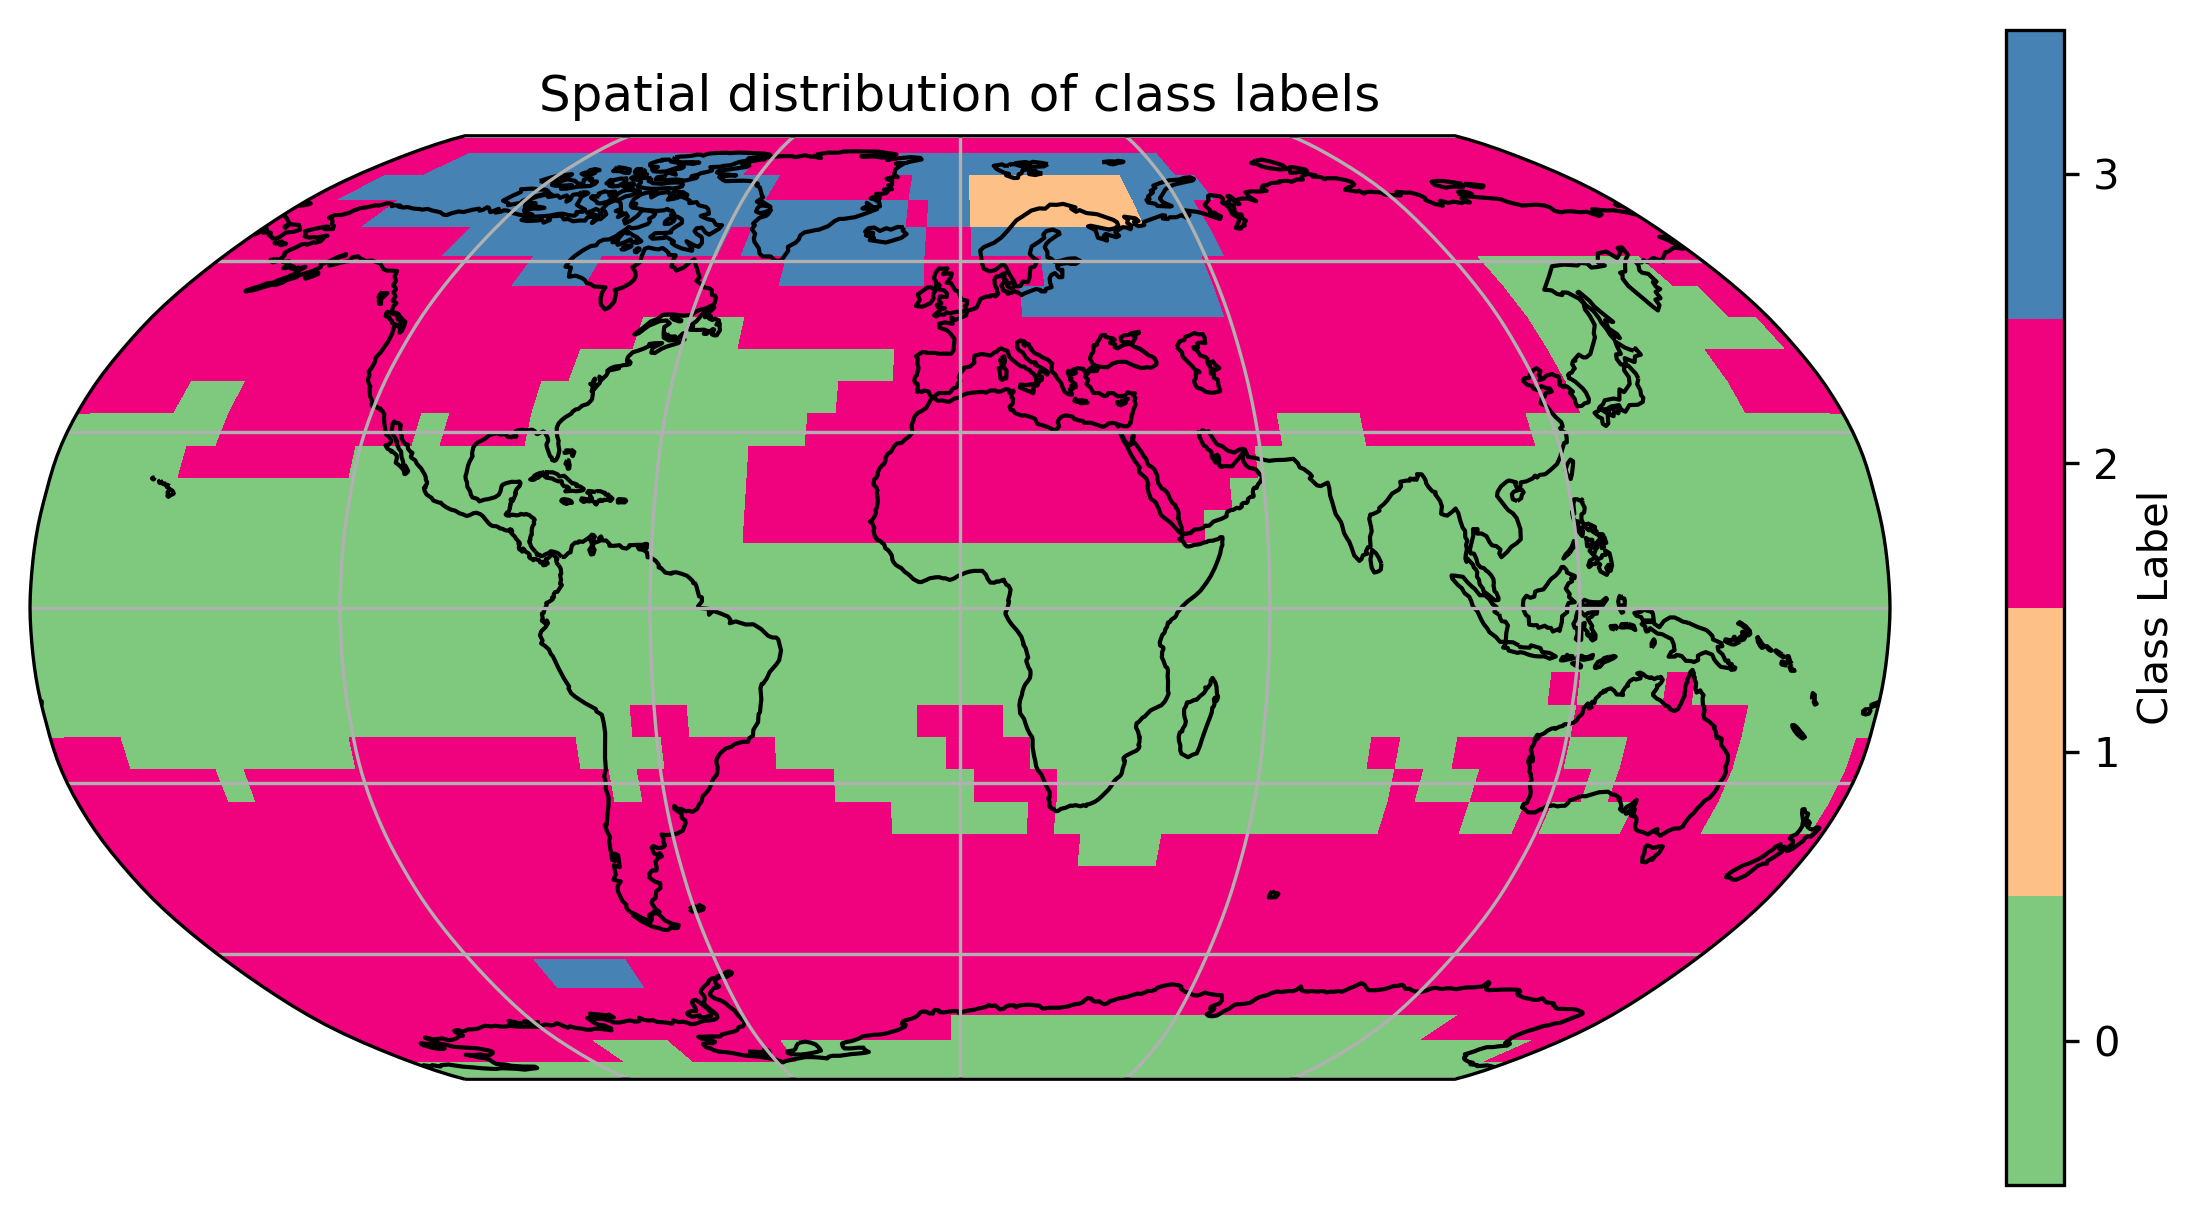

In [14]:
from toolbox import GMM_functions as gf
import importlib
importlib.reload(gf)

ds_loveclim_EOFs_GMM,reshaped_probs=gf.GMM4EOFS(eofs, ds_sat,n_components=4,init_params='kmeans')
gf.plot_labels(ds_loveclim_EOFs_GMM)

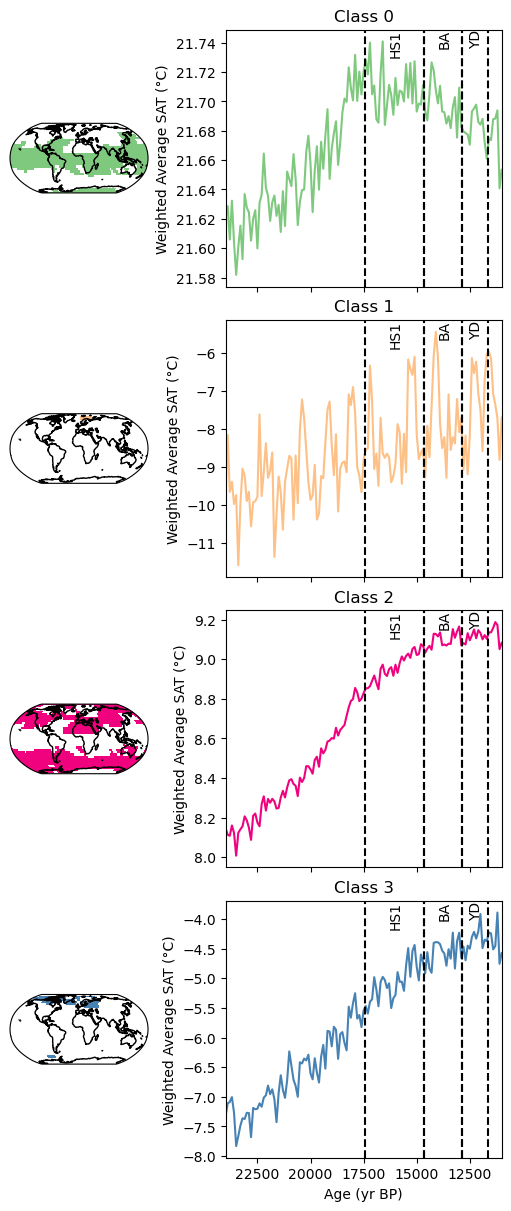

In [15]:
from toolbox import GMM_functions as gf
import importlib
importlib.reload(gf) 

uncor_weighted_avg=gf.plot_weighted_average_curve(ds_loveclim_EOFs_GMM.copy(), dpi=100)